<a href="https://colab.research.google.com/github/BurhanAmir/Machine-Learning-Project/blob/main/ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Setup | Importing necessary Libraries\**

In [11]:
# Run in a Jupyter cell or script

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt
import os
import gdown
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix)

# For reproducibility
RANDOM_SEED = 42

**Mounting Drive\**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing dataset through drive.\**

In [ ]:
# Install gdown if needed
!pip install --quiet gdown

# File ID from the shared link
dataset_id = "1j8dxLoIHIel8J8DY36xUyT-BO37-zvZo"
url = f"https://drive.google.com/uc?id={dataset_id}"
output = "dataset.csv"

# Download only if not already downloaded
if not os.path.exists(output):
    print("⏬ Downloading dataset from Google Drive …")
    gdown.download(url, output, quiet=False)
else:
    print("✅ Dataset already exists locally – skipping download.")

# Load into pandas DataFrame
df = pd.read_csv(output)

# Quick check
print("✅ Dataset loaded. Here are first few rows:")
print(df.head())


⏬ Downloading dataset from Google Drive …


Downloading...
From: https://drive.google.com/uc?id=1j8dxLoIHIel8J8DY36xUyT-BO37-zvZo
To: /content/dataset.csv
100%|██████████| 978k/978k [00:00<00:00, 85.1MB/s]

✅ Dataset loaded. Here are first few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

In [28]:
#df.head()
#df.tail()
#df.info()
#df.describe()
#df.describe(include='all')
df.shape
#df.dtypes


(7043, 21)

**Few enteries of the datset.\**

In [ ]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**General insights about data.\**     EDA (Explorartory Data Analysis)

In [13]:
# Quick info
print(df.shape)
print(df.columns.tolist())
df.info()
df.describe(include='all').T


(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   ob

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Cleaning the missing data**

In [16]:
# Clean TotalCharges
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()
df['TotalCharges'].replace('', np.nan, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# How many missing?
missing_total = df['TotalCharges'].isna().sum()
print("Missing TotalCharges:", missing_total)

# Impute: where tenure>0, estimate as MonthlyCharges * tenure; else fill median
median_total = df['TotalCharges'].median()
mask = df['TotalCharges'].isna() & (df['tenure'] > 0)
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'MonthlyCharges'] * df.loc[mask, 'tenure']
df['TotalCharges'].fillna(median_total, inplace=True)

# Confirm no missing left
print("Missing after impute:", df['TotalCharges'].isna().sum())


Missing TotalCharges: 11
Missing after impute: 0


/tmp/ipython-input-267019185.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-267019185.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts(dropna=False)


,count
Churn,
0,5174
1,1869


In [ ]:
# Identify feature types (adjust if you want to drop customerID)
df.columns

# Drop customerID (identifier)
df = df.drop(columns=['customerID'])

# Numeric features
num_features = ['tenure','MonthlyCharges','TotalCharges']

# Candidates for binary mapping (Yes/No) or keep as categorical
binary_yesno = ['Partner','Dependents','PhoneService','PaperlessBilling']

# All remaining object columns -> categorical to one-hot
cat_features = df.select_dtypes(include=['object']).columns.tolist()
# remove any columns already in binary or ones we handled
cat_features = [c for c in cat_features if c not in binary_yesno]

print("Numerical:", num_features)
print("Binary (Yes/No to map):", binary_yesno)
print("Categorical (one-hot):", cat_features)


Numerical: ['tenure', 'MonthlyCharges', 'TotalCharges']
Binary (Yes/No to map): ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Categorical (one-hot): ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
for c in binary_yesno:
    df[c] = df[c].map({'Yes':1, 'No':0})

# Some categorical columns may have 'No internet service' or 'No phone service' categories.
# Keep them — OneHotEncoder will handle.


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


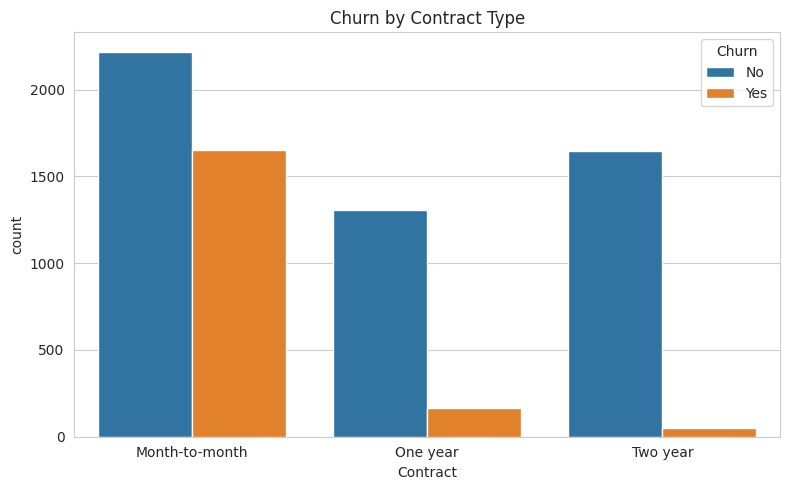

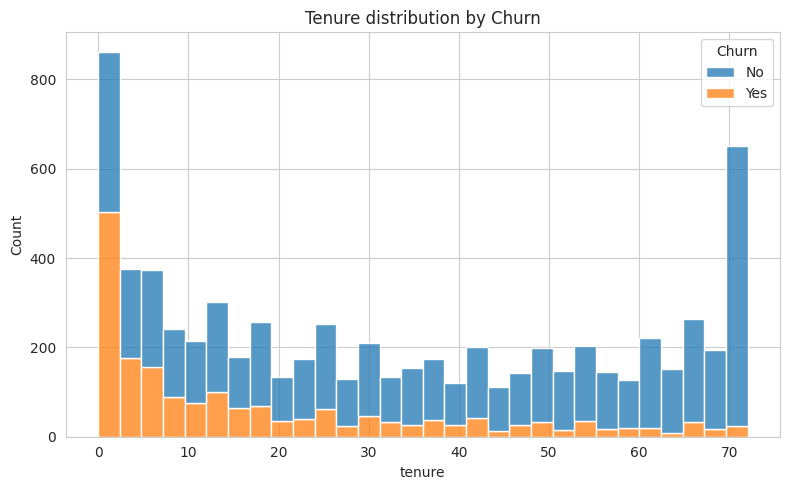

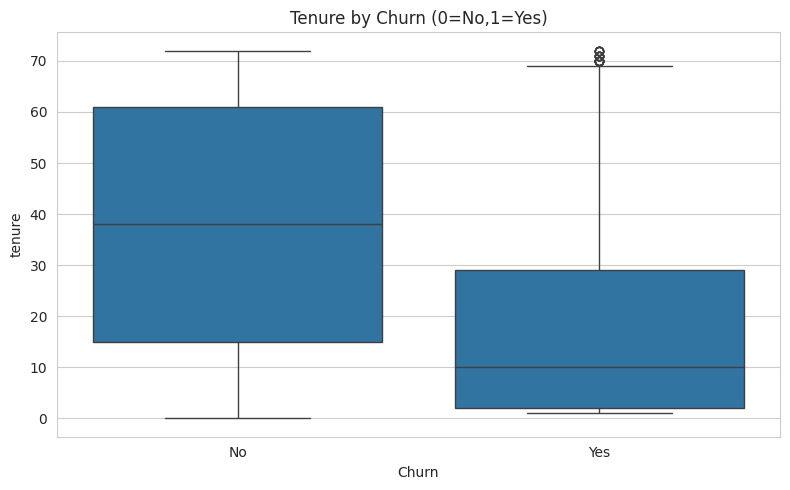

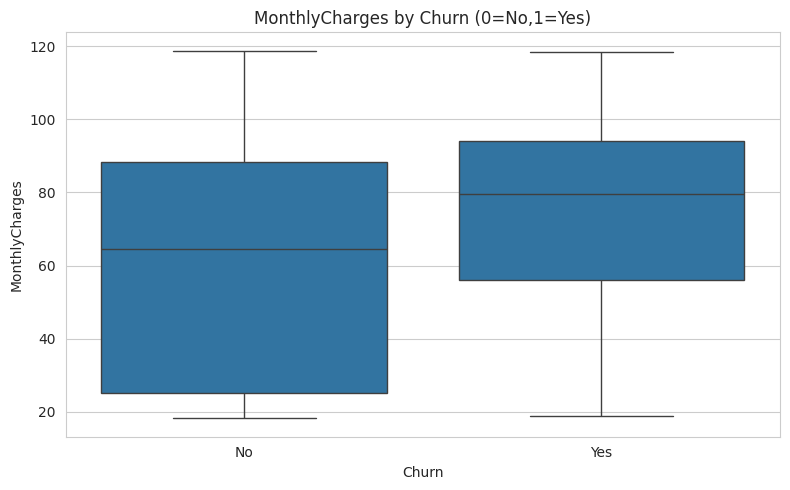

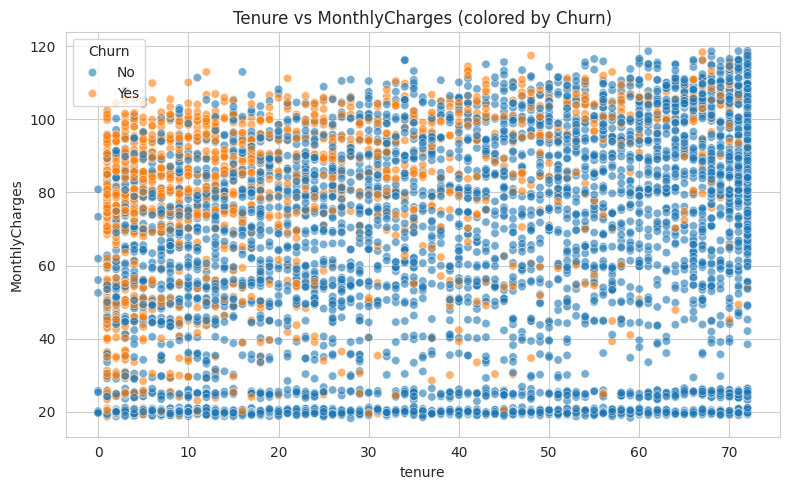

In [20]:
# Churn by Contract Type
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xlabel("Contract")
plt.legend(title='Churn', labels=['No','Yes'])
plt.tight_layout()
plt.show()

# Tenure vs Churn: show distribution of tenure grouped by churn
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Tenure distribution by Churn")
plt.tight_layout()
plt.show()

# Or boxplot: tenure by churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# MonthlyCharges vs Churn (boxplot + swarm for detail)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MonthlyCharges by Churn (0=No,1=Yes)")
plt.tight_layout()
plt.show()

# Scatter Tenure vs MonthlyCharges colored by churn
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title("Tenure vs MonthlyCharges (colored by Churn)")
plt.tight_layout()
plt.show()


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_SEED, stratify=y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Churn distribution train:", y_train.mean(), " test:", y_test.mean())


Train size: (4930, 19)
Test size: (2113, 19)
Churn distribution train: 0.2653144016227181  test: 0.26549929010885


In [ ]:
# Recompute lists for pipeline based on X_train dtypes
numeric_features = ['tenure','MonthlyCharges','TotalCharges']
# binary features already numeric: keep them in numeric_features or treat separately.
binary_features = ['Partner','Dependents','PhoneService','PaperlessBilling']
# Now categorical (object dtype)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("numeric:", numeric_features)
print("binary:", binary_features)
print("categorical:", categorical_features)

# Column transformer:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features + binary_features),  # scale numerics + binary
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with LogisticRegression
pipe = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_SEED))
])

# Fit baseline model
pipe.fit(X_train, y_train)

numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
binary: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

Accuracy: 0.8055
Precision: 0.6576
Recall: 0.5579
F1-score: 0.6037
ROC-AUC: 0.8440

Classification Report:

              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1552
       Churn       0.66      0.56      0.60       561

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



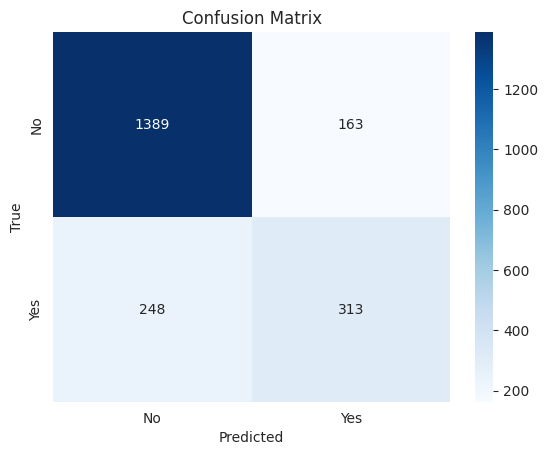

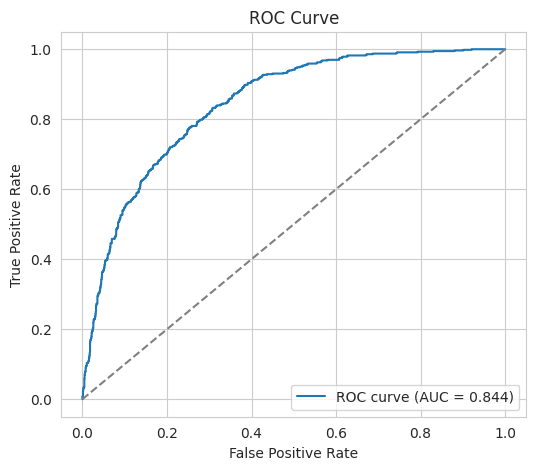

In [ ]:
# Predict
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]  # probability for positive class

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {rocauc:.4f}")

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn','Churn']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {rocauc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
